# Supplementary Figure 9
This notebook was used to create the supplementary figure 9.

In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

#To make reproducible plots
np.random.seed(41)

In [3]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/')

# HVG and NN (only do first time)

In [ ]:
#Load in data
data_path='/home/hers_basak/jjiang/jack/for_next_person/data/scvi_model_final/harmonized_base_filtered.h5ad'

In [ ]:
data= sc.read_h5ad(data_path)

In [ ]:
data

In [7]:
sc.pp.highly_variable_genes(
    data,
    n_top_genes=4000,
    batch_key="atlas",
    subset=True)

In [8]:
sc.pp.neighbors(data, n_pcs=90,n_neighbors=40,use_rep='X_scVI')

sc.tl.umap(data)

In [9]:
data.write_h5ad('/home/hers_basak/jjiang/jack/for_next_person/data/scvi_model_final/harmonized_base_filtered_figure.h5ad')

# Load 

In [4]:
data= sc.read_h5ad('/home/hers_basak/jjiang/jack/for_next_person/data/scvi_model_final/harmonized_base_filtered_figure.h5ad')

# A

In [34]:
new_order={'siletti':'#E2F393','altena':'#70BFA0','welch':'#A12C5D','wang':'#E66D34','smajic':'#F6DF81','agarwal':'#574EA2'}
data.obs['atlas']=pd.Categorical(values=data.obs['atlas'],categories=list(new_order.keys()),ordered=True)

In [41]:
data_indices=data.obs.sort_values(by='atlas').index

In [42]:
data_sorted=data[data_indices]

In [43]:
data_sorted.obs['atlas']

10X330_8:GGAGGTAGTCGGTGTC    siletti
10X330_8:GAACGTTAGGATACGC    siletti
10X330_8:TCGTCCAAGTATTAGG    siletti
10X330_8:ACTGTGAAGAAGCTCG    siletti
10X330_8:GGGCCATCAGAGGACT    siletti
                              ...   
N2B_CGAGAAGGTTCACGGC         agarwal
N2B_AAAGATGTCCCATTTA         agarwal
N2B_CAGGTGCTCGGCGCTA         agarwal
N2B_CAACCAAGTCCCGACA         agarwal
N3_TGACTAGTCATCACCC          agarwal
Name: atlas, Length: 507763, dtype: category
Categories (6, object): ['siletti' < 'altena' < 'welch' < 'wang' < 'smajic' < 'agarwal']

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


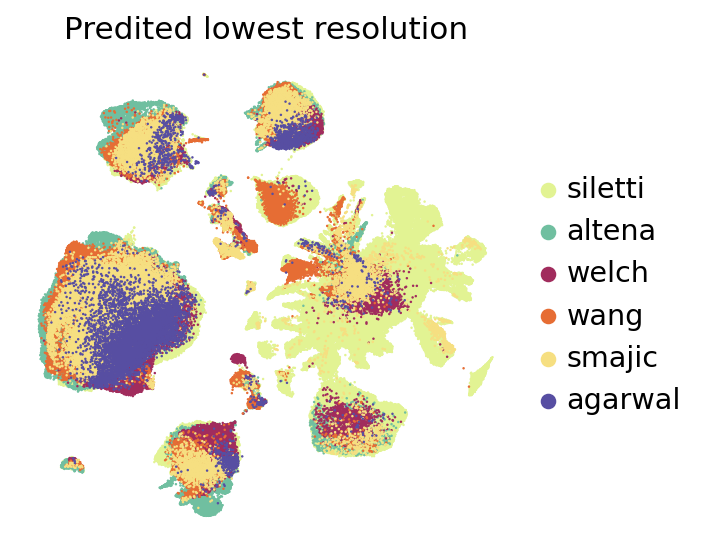

In [44]:
sc.pl.umap(data_sorted, color=['atlas'], title='Predited lowest resolution',
               use_raw=False, s=5, wspace=0.5,save='_atlas.pdf',palette=new_order,frameon=False)

# B

In [12]:
print(data.obs['atlas'].value_counts())
    

siletti    282660
altena      84503
welch       64441
wang        39786
smajic      28195
agarwal      8178
Name: atlas, dtype: int64


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tool

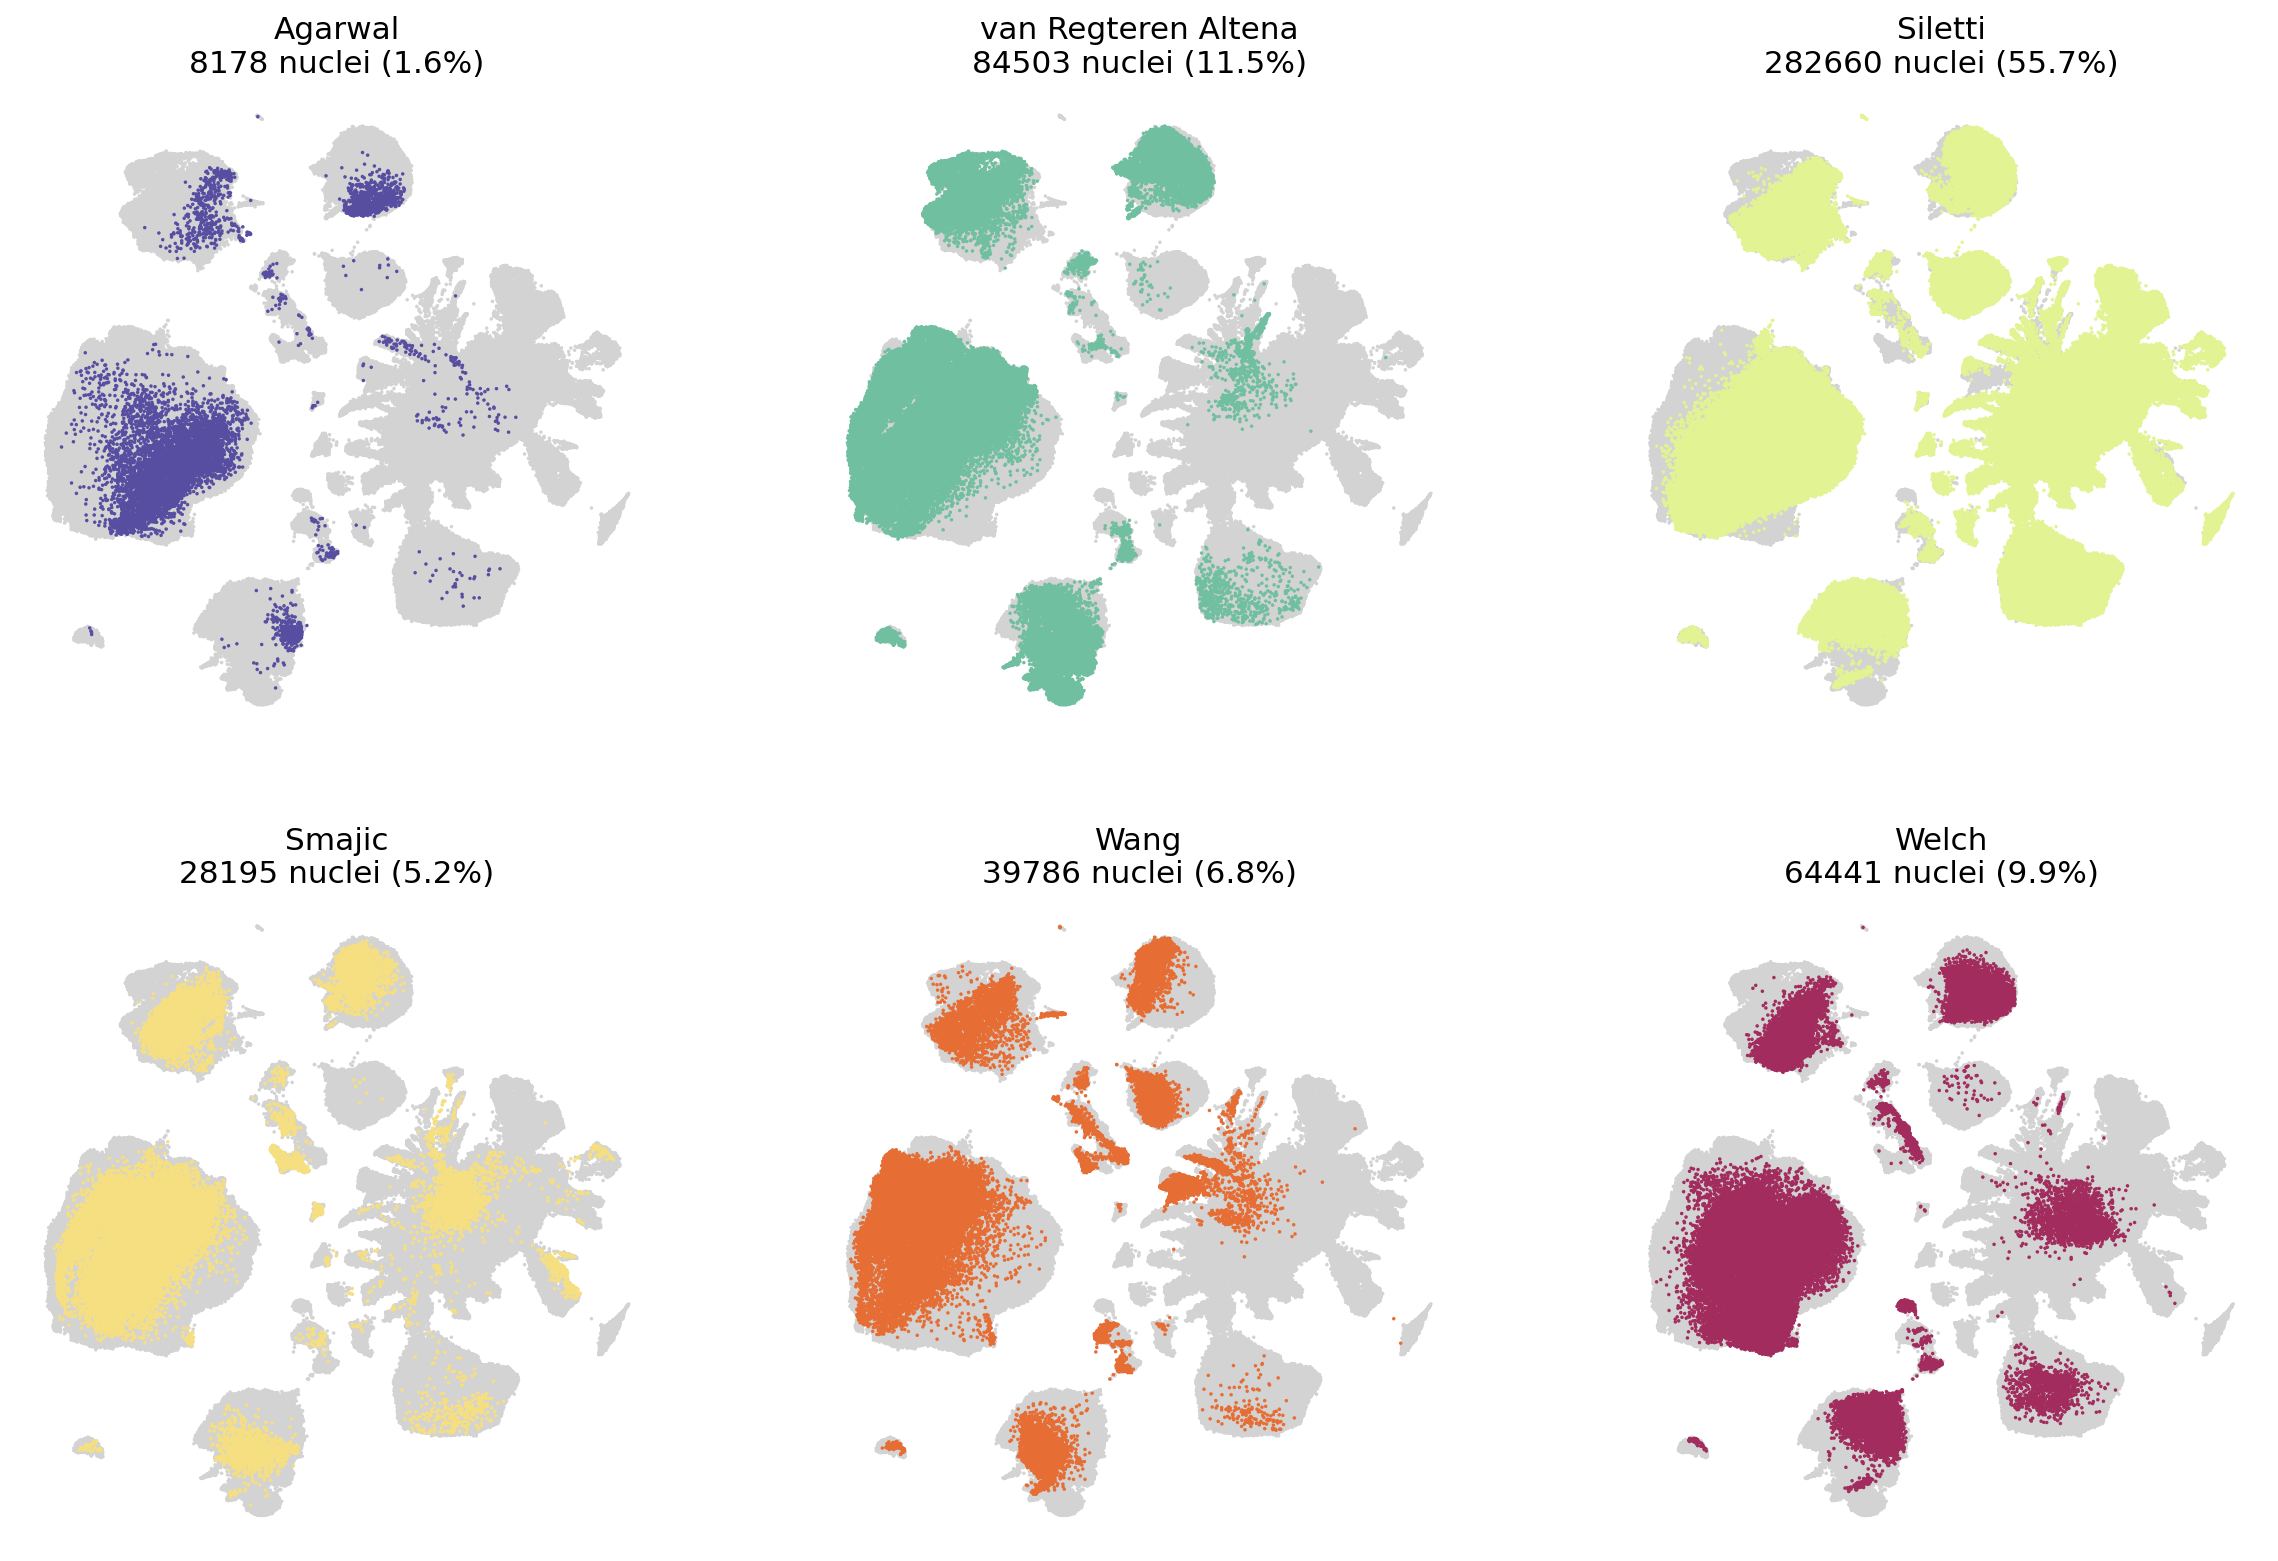

In [47]:
feature1='atlas'
palette=new_order
fig, axs = plt.subplots(2, 3, figsize = [18,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)
sc.pl.umap(data_sorted, color=feature1, groups= 'agarwal', use_raw=False, s=10, ax= axs[0,0],show=False, title='Agarwal\n8178 nuclei (1.6%)',legend_loc=None,palette=palette,frameon=False)
sc.pl.umap(data_sorted, color=feature1, groups= 'altena', use_raw=False, s=10, ax= axs[0,1],show=False, title='van Regteren Altena\n84503 nuclei (11.5%)',legend_loc=None,palette=palette,frameon=False)
sc.pl.umap(data_sorted, color=feature1, groups= 'siletti', use_raw=False, s=10, ax= axs[0,2],show=False, title='Siletti\n282660 nuclei (55.7%)',legend_loc=None,palette=palette,frameon=False)
sc.pl.umap(data_sorted, color=feature1, groups= 'smajic', use_raw=False, s=10, ax= axs[1,0],show=False, title='Smajic\n28195 nuclei (5.2%)',legend_loc=None,palette=palette,frameon=False)
sc.pl.umap(data_sorted, color=feature1, groups= 'wang', use_raw=False, s=10, ax= axs[1,1],show=False, title='Wang\n39786 nuclei (6.8%)',legend_loc=None,palette=palette,frameon=False)
sc.pl.umap(data_sorted, color=feature1, groups= 'welch', use_raw=False, s=10, ax= axs[1,2],show=False, title='Welch\n64441 nuclei (9.9%)',legend_loc=None,palette=palette,frameon=False)
fig.savefig(f'/home/hers_basak/jjiang/jack/figures/umap_atlas_subplots.pdf',bbox_inches='tight')

# C

In [35]:
celltype_order=['Astrocyte','Endothelial','Microglia','Neuron','OPC','Oligodendrocyte','Ependymal','Pericyte','Miscellaneous']
data.obs['harmonized_lowest']=pd.Categorical(data.obs['harmonized_lowest'], categories=celltype_order,ordered=True)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


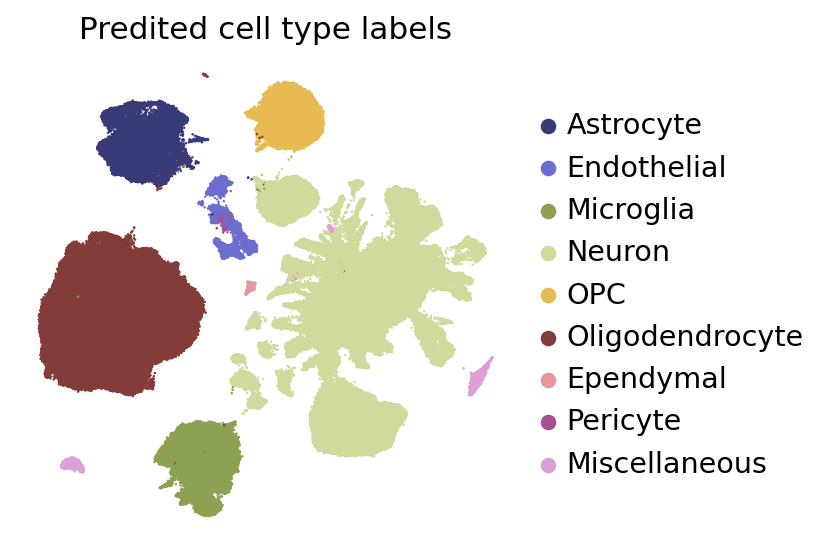

In [36]:
sc.pl.umap(data, color=['harmonized_lowest'], title='Predited cell type labels',
               use_raw=False, s=5, wspace=0.5,save='_atlas_lowest_predicted.pdf',palette='tab20b',frameon=False)

# D

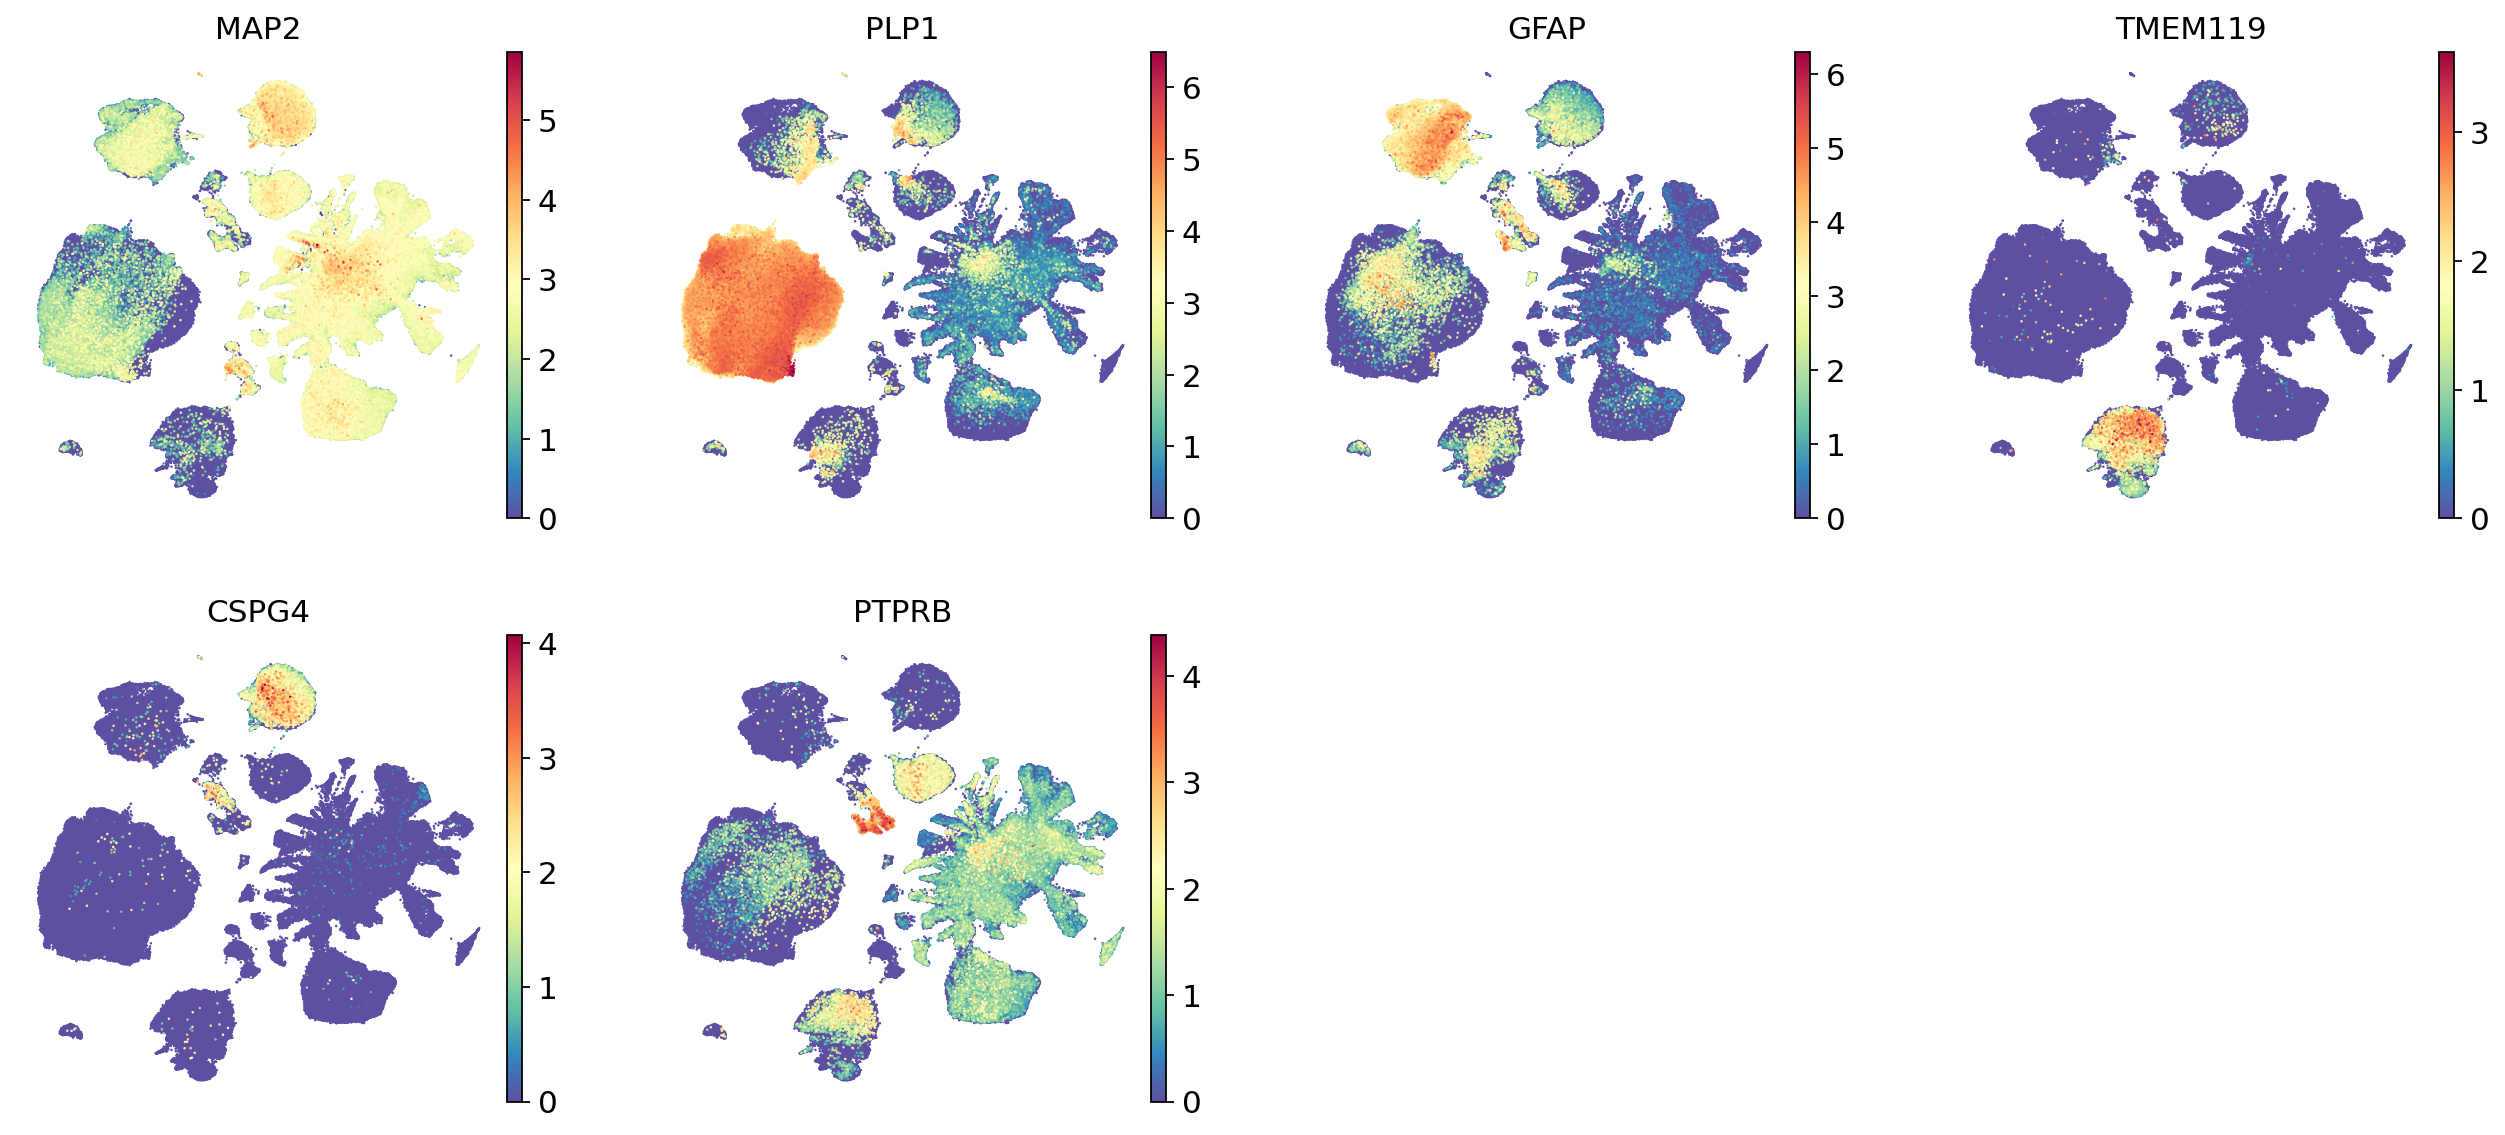

In [6]:
markers=['MAP2', 'PLP1','GFAP','TMEM119','CSPG4','PTPRB']
sc.pl.umap(data, color=markers, title=markers, use_raw=False, s=5,save = "_markers.pdf",frameon=False,cmap='Spectral_r')